<a href="https://colab.research.google.com/github/Anas84464/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading Dataset and Importing Packages**

In [ ]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload data path
working_path ='/content/drive/MyDrive/Machine Learning Classification Project/default of credit card clients.xls'

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.7.13.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.144+
Version          : #1 SMP Tue Dec 7 09:58:10 PST 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.6
pytz             : 2022.1
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.28
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [ ]:
pip install xlrd==1.2.0

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.7.13.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.144+
Version          : #1 SMP Tue Dec 7 09:58:10 PST 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.6
pytz             : 2022.1
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.28
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [ ]:
# Read data
cred_df = pd.read_excel(working_path)

In [ ]:
# View first 5 rows of dataset
cred_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# View last 5 rows of dataset
cred_df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## **Our dataset looks so fuzzy, we have to make some changes like changing to names of columns.**

In [ ]:
# Lets know the shape of dataset
cred_df.shape

(30001, 25)

In [ ]:
# View all the information summary about the dataset
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

##**There are 0 null-values in the given dataset. So, we don't have to deal with that.**

In [ ]:
# Creating variable with the help of index 0
column_names = list(cred_df.iloc[0].values)
# droping first row 
cred_df.drop(index = cred_df.index[0],axis = 0, inplace = True)
# Reset the columns
cred_df = cred_df.set_axis(column_names,axis = 1)
# Changing the data-types of each features
cred_df = cred_df.astype('int')
cred_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
# Get all the features of dataset
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# **Describing the columns**

*  ID: ID of each customer 
*  LIMIT_BAL: Amount of the given credit (NT dollar)

* SEX: Gender(Male = 1, Female: 2)
* EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
* AGE: Age in years


**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

*   PAY_0: Repayment status in September, 2005 (same scale as given)
*   PAY_2: Repayment status in August, 2005 (same scale as given)
*   PAY_3: Repayment status in July, 2005 (same scale as given)
* PAY_4: Repayment status in June, 2005 (same scale as given)  
* PAY_5: Repayment status in May, 2005 (same scale as given)
*PAY_6: Repayment status in April, 2005 (same scale as given)
*BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*default payment next month: Default Payments(1 = Yes, 0 = No)

We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict either he/she is a defaulter or not if he/she possess with these qualities.

In [ ]:
# Check the unique values
cred_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
# Check the description of the dataset
cred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Insights**
 Tha dataset has 30000 observations and 25 features.

 Default payment next month is our target variable

## **Rename the names of features according to the description which is written above, it will make our task easy in Exploratoy data analysis and in further appoaches.**

In [ ]:
# renaming features
cred_df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY','PAY_6':'REPAY_APRIL',
                        'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                        'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                        'default payment next month': 'Default_Payments'},inplace = True)

In [ ]:
cred_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Yeah!!!

Now, Our dataset makes much more sense after renaming it.

In [ ]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Default_Payments'],
      dtype='object')

In [ ]:
#excluding discrete data
excluded_cols = ['ID','SEX', 'EDUCATION','MARRIAGE', 'REPAY_SEPT','REPAY_AUG','REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL']
cred_df1 = cred_df.drop(excluded_cols,axis = 1)

In [ ]:
# descriptive statistics of continous data
cred_df1.describe()

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Number of target variable
cred_df['Default_Payments'].value_counts()

0    23364
1     6636
Name: Default_Payments, dtype: int64

#**Exploratory Data Analysis**


#**Dependent Variable**

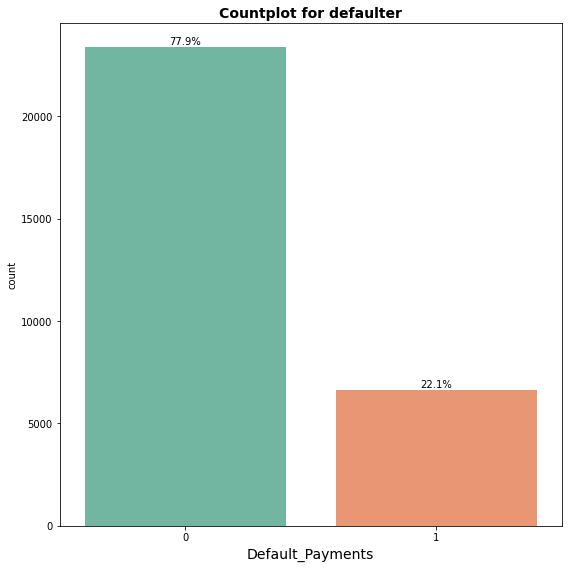

In [ ]:
# Visualizing defaulters
ax = sns.countplot(x = cred_df['Default_Payments'],palette = 'Set2')
plt.xlabel('Default_Payments',fontsize = 14)
plt.title('Countplot for defaulter',fontweight = 'bold',fontsize = 14)

total = len(cred_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

##**Conclusion: From above plot we can conclude that defaulter are less in our dataset.**

##**Countplot shows that the customer is defaulter or not, 1 denotes the defaulter and 0 refers to who are not defaulters.**
##**As it can be seen clearly in Countplot that data is imbalanced.**
## **Imbalanced data leads us to the wrong prediction as we know that Logistic and Random Forest have a bias nature towards the majority class it may be misclassified while fiting the model.**

# **Analysis of Independent variable**
We have few categorical features in our dataset:

*   Sex
*   Education
*   Marriage
*   Age






In [ ]:
# Sex
cred_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Education
cred_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Converting Education feature into 4 possible classes
fil = ((cred_df['EDUCATION'] == 0) | (cred_df['EDUCATION'] >= 5))
cred_df.loc[fil, 'EDUCATION'] = 4
cred_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# Marriage
cred_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

According to description of dataset 0 is also comes in others classification. So, I am going add 0 classification with 3

In [ ]:
# Converting Marriage feature into 3 ossible classifiation
fil_1 = cred_df['MARRIAGE'] == 0
cred_df.loc[fil_1, 'MARRIAGE'] = 3
cred_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
# Creating a dataframe with categorical features and dependent variable 
categorical_features = ['SEX','EDUCATION','MARRIAGE']
df_cat = cred_df[categorical_features]
df_cat['Defaulters'] = cred_df['Default_Payments']
df_cat.head(3)

,SEX,EDUCATION,MARRIAGE,Defaulters
1,2,2,1,1
2,2,2,2,1
3,2,2,2,0


There is another thing that need to be done here, we have to change the classification denotion from 0,1,2,3 to a reasonable class that they actually tells us in the data description for e.g.,

Sex: (1 = Male,0 = Female)

So, we have to this with all the three categorical features

In [ ]:
# Now replace the classification denotion 
df_cat['SEX'].replace({1 : 'Male',2 : 'Female'}, inplace = True)
df_cat['EDUCATION'].replace({1 : 'Graduates',2 : 'University',3 : 'High School',4 : 'Others'},inplace = True)
df_cat['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'},inplace = True)

#**Plotting all these Categorical features with Dependent variable**

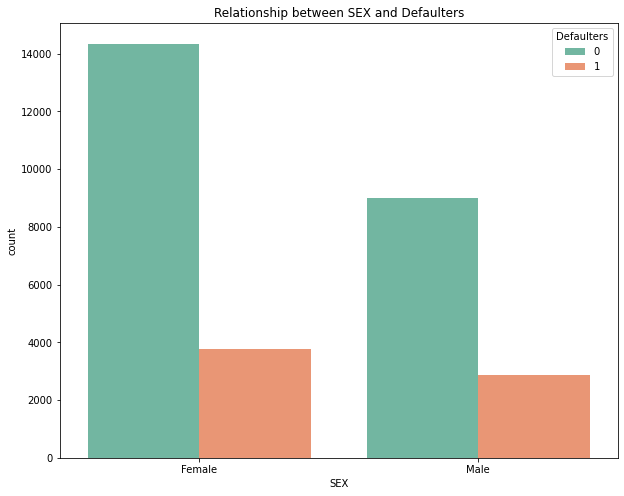

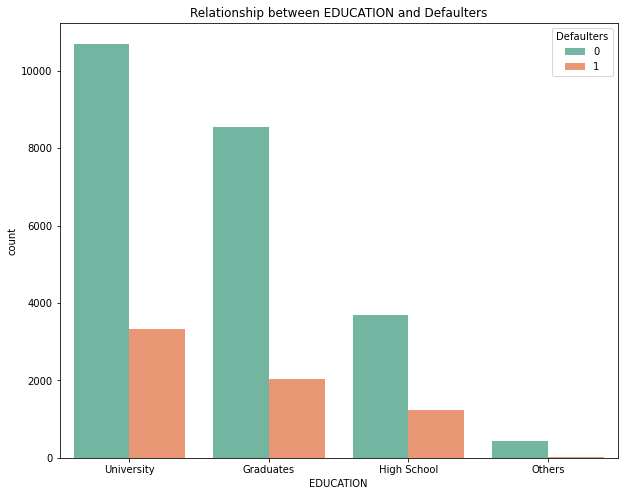

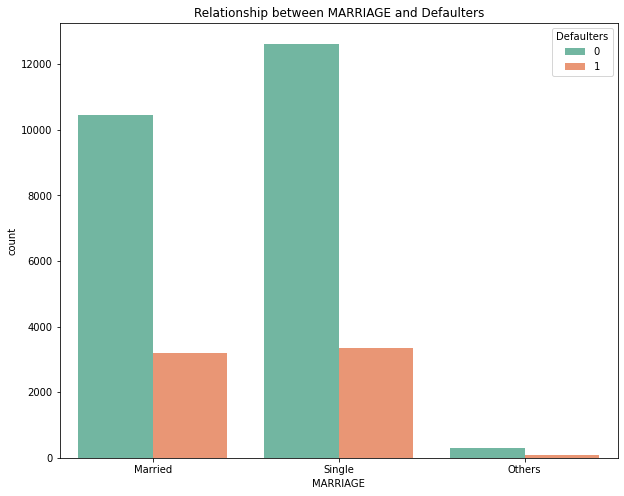

In [ ]:
# categorical features with dependent variable 
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (10,8))
  sns.countplot(x = col, hue = 'Defaulters', data = df_cat,palette = "Set2")
  ax.set(title = 'Relationship between ' +col+ ' and Defaulters')

#**Insights of categorical feature with dependent variable**
* Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Males.
*University and Graduates are holding high proportions of Credit cards.
*Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters

#**Age**

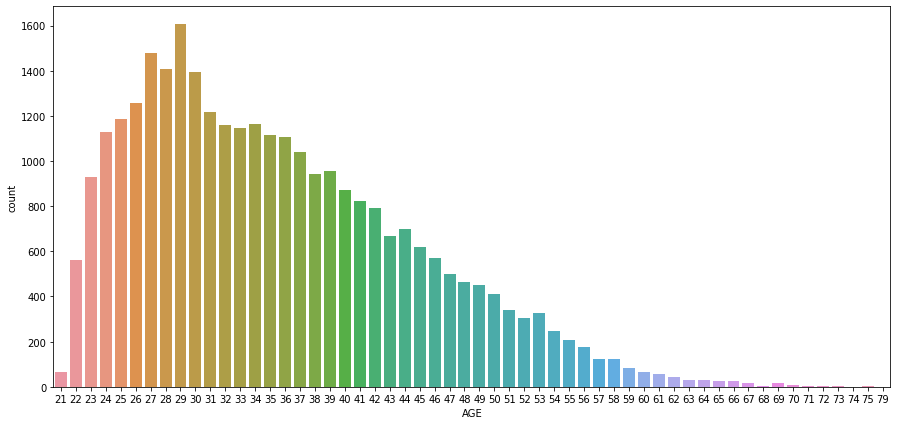

In [ ]:
# Plot the graph of number of ages of people with credit card.
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = cred_df)

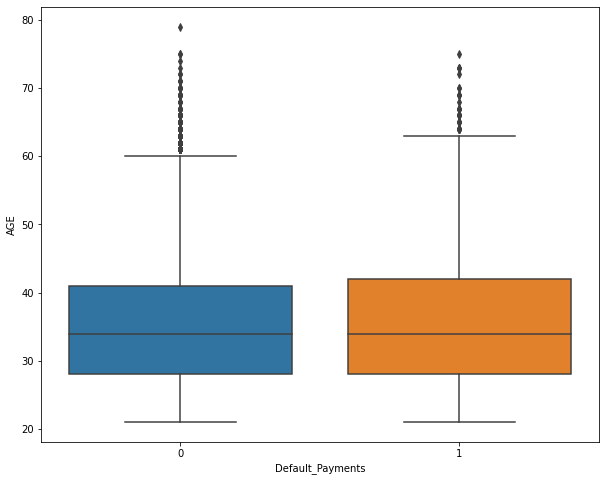

In [ ]:
# Plot to check the data distribution
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Default_Payments', y = 'AGE', data = cred_df)

Conclusion: From above plot we can see that people from age 24 to 36 uses more credit card. Above 60 years of age people rarely use credit card.

# **Numerical Features**
#Limit Balance

In [ ]:
# Limit balance description
cred_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Text(0, 0.5, 'Counts of defaulters')

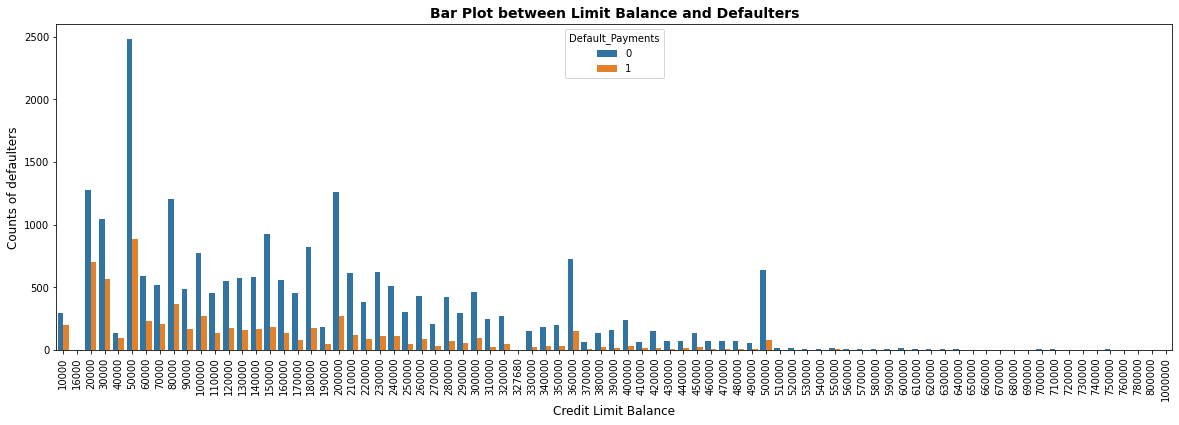

In [ ]:
# Limit Balance 
plt.figure(figsize = (20,6))
sns.countplot(x = 'LIMIT_BAL',hue = 'Default_Payments',data = cred_df,)
plt.xticks(rotation = 90)
plt.title('Bar Plot between Limit Balance and Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Counts of defaulters',fontsize = 12)# Plotting distribution plot of Limit Bal.


* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
* After the credit limit 5,00,000, number of defaulters are almost negligible.

#**PAYMENT HISTORY ACCORDING TO MONTHS**
#**Having insights of Pay scale with Default Payments**

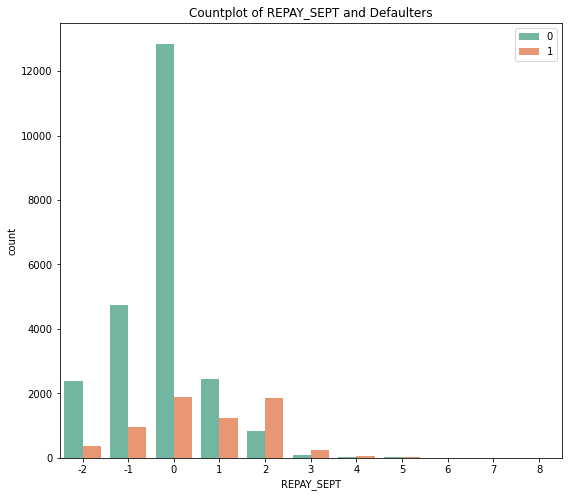

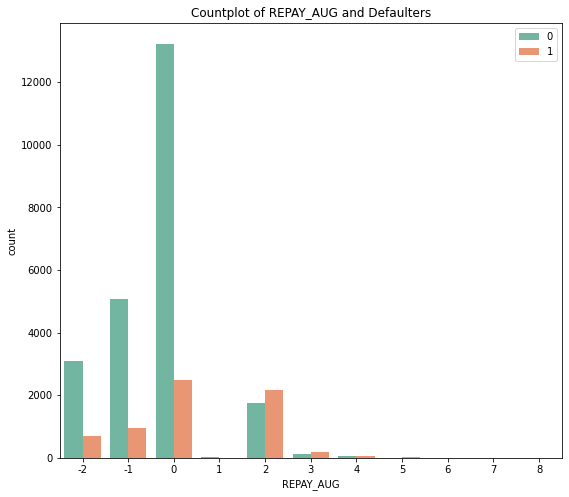

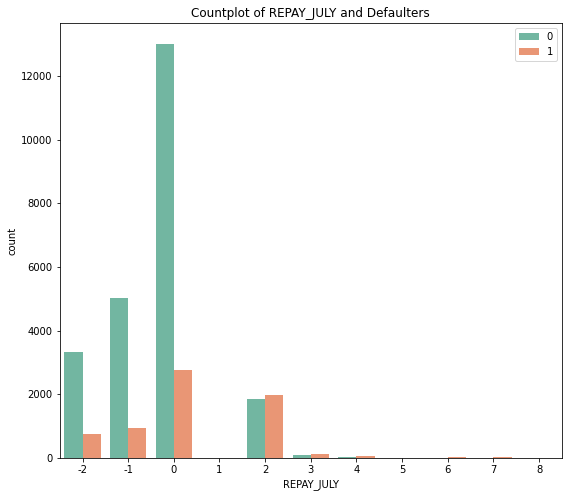

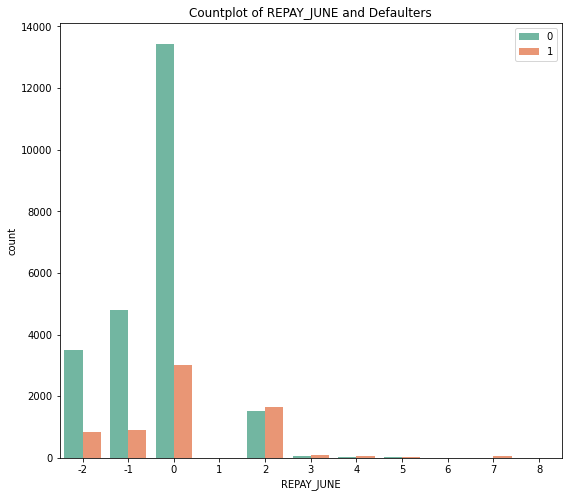

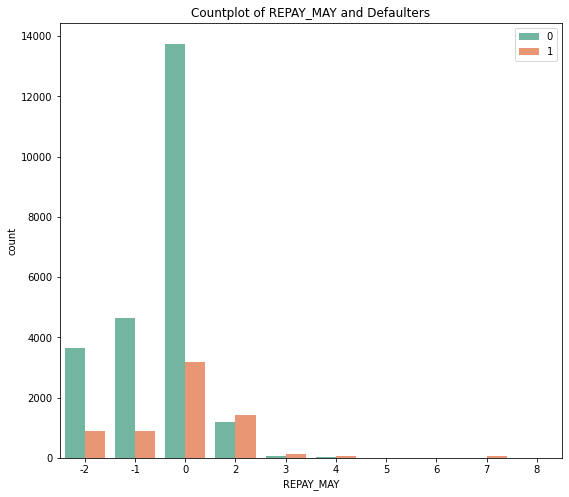

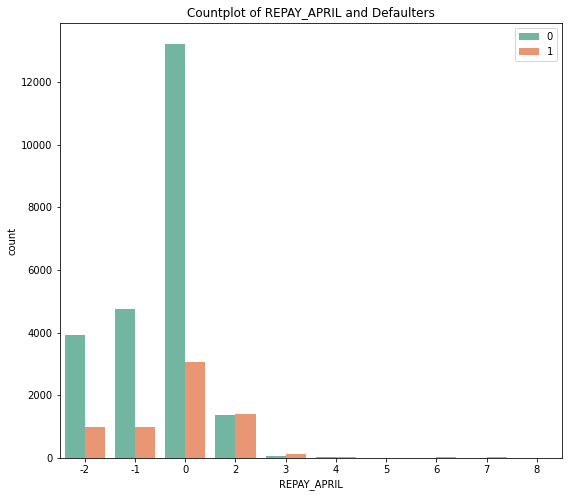

In [ ]:
# Amount paid in different months 
pay_scale = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL']
for col in pay_scale:
  fig, ax = plt.subplots(figsize = (9,8))
  sns.countplot(x = col, hue = 'Default_Payments',data = cred_df,palette = 'Set2')
  ax.legend(loc = 'upper right')
  ax.set(title = 'Countplot of '+col+' and Defaulters')

## Describing the Xlabel of Repay scale
-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

##**Lets Visualize the rest features of bill payments and amount of previous payments of different months**
###**BILL AMOUNT**

In [ ]:
# Having just overview of mean of bill payments of defaulters
bill_amt = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL']
cred_df.groupby('Default_Payments')[bill_amt].mean()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


* #### Defaulters do not have average bill payment amount not more than 48,000(NT Dollar)
* #### The most concerned area about the defaulters are around the average bill amoun

In [ ]:
# min bill payments of defaulters & not defaulters
cred_df.groupby('Default_Payments')[bill_amt].min()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,-165580,-69777,-157264,-170000,-81334,-209051
1,-6676,-17710,-61506,-65167,-53007,-339603


In [ ]:
# Max bill payments of defaulters & not defaulters
cred_df.groupby('Default_Payments')[bill_amt].max()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,964511,983931,1664089,891586,927171,961664
1,613860,581775,578971,548020,547880,514975


#### from above matrix we can conclude that defaulters lie within the range of maximum Bill Payment of approximately 60,000(NT Dollar

Total Bill Amount

Pair plot: This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

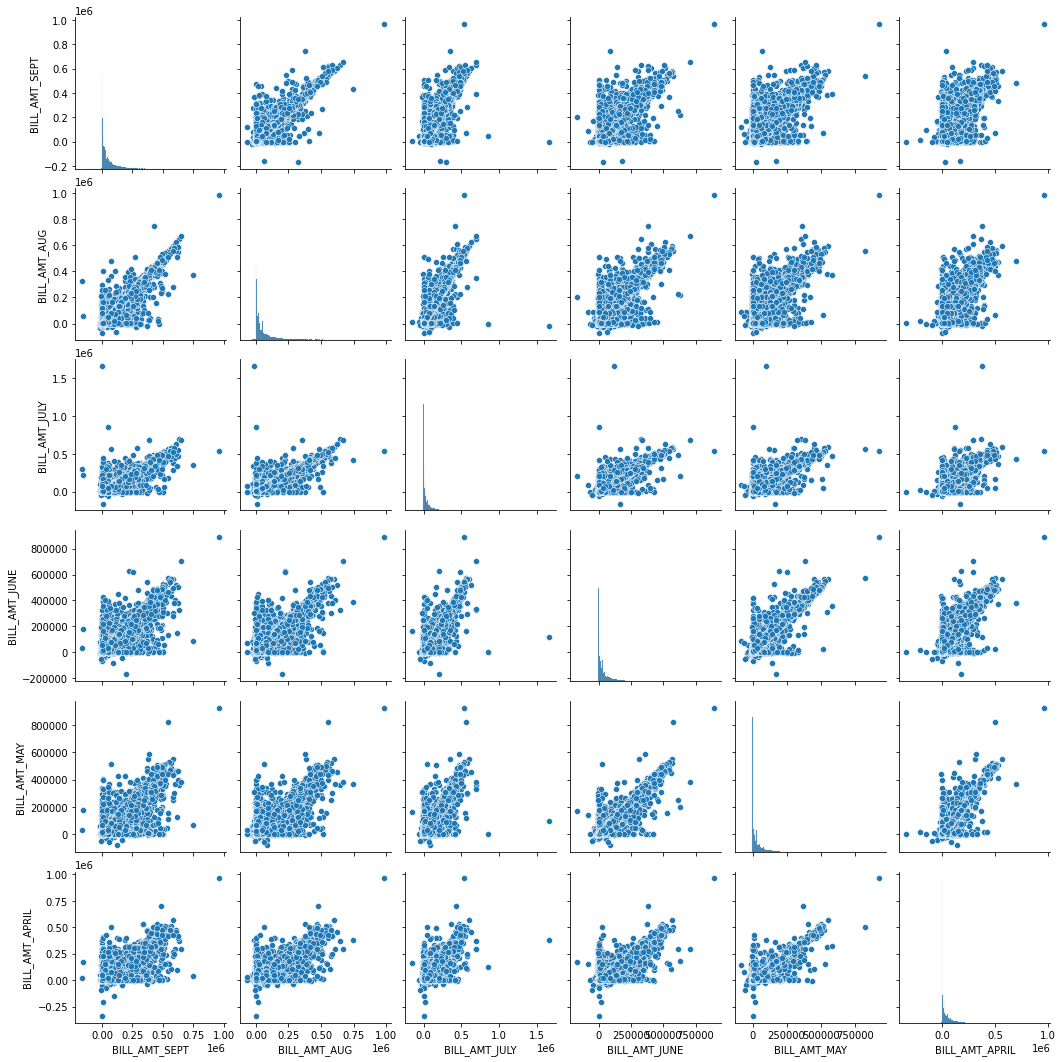

In [ ]:
# pairplot of BILL AMOUNT of different months
sns.pairplot(cred_df[bill_amt])

## **PAYMENT AMOUNT**

In [ ]:
#Let's have a look at mean of  previous payment of different months 
pay_amt = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
cred_df.groupby("Default_Payments")[pay_amt].mean()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


* ### Defaulters do not have average previous bill payment amount not more than 3500(NT Dollar)
* ### The most concerned area about the defaulters are around the average previous bill payment amount

In [ ]:
# minimum previous amount paid by defaulters
cred_df.groupby('Default_Payments')[pay_amt].min()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,0,0,0,0,0,0
1,0,0,0,0,0,0


In [ ]:
# maximum previous amount paid by defaulters
cred_df.groupby('Default_Payments')[pay_amt].max()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,873552,1684259,896040,621000,426529,528666
1,300000,358689,508229,432130,332000,345293


from above matrix we can conclude that defaulters lie within the range of maximum previous bill Payment of approximately 50,000(NT Dollar)

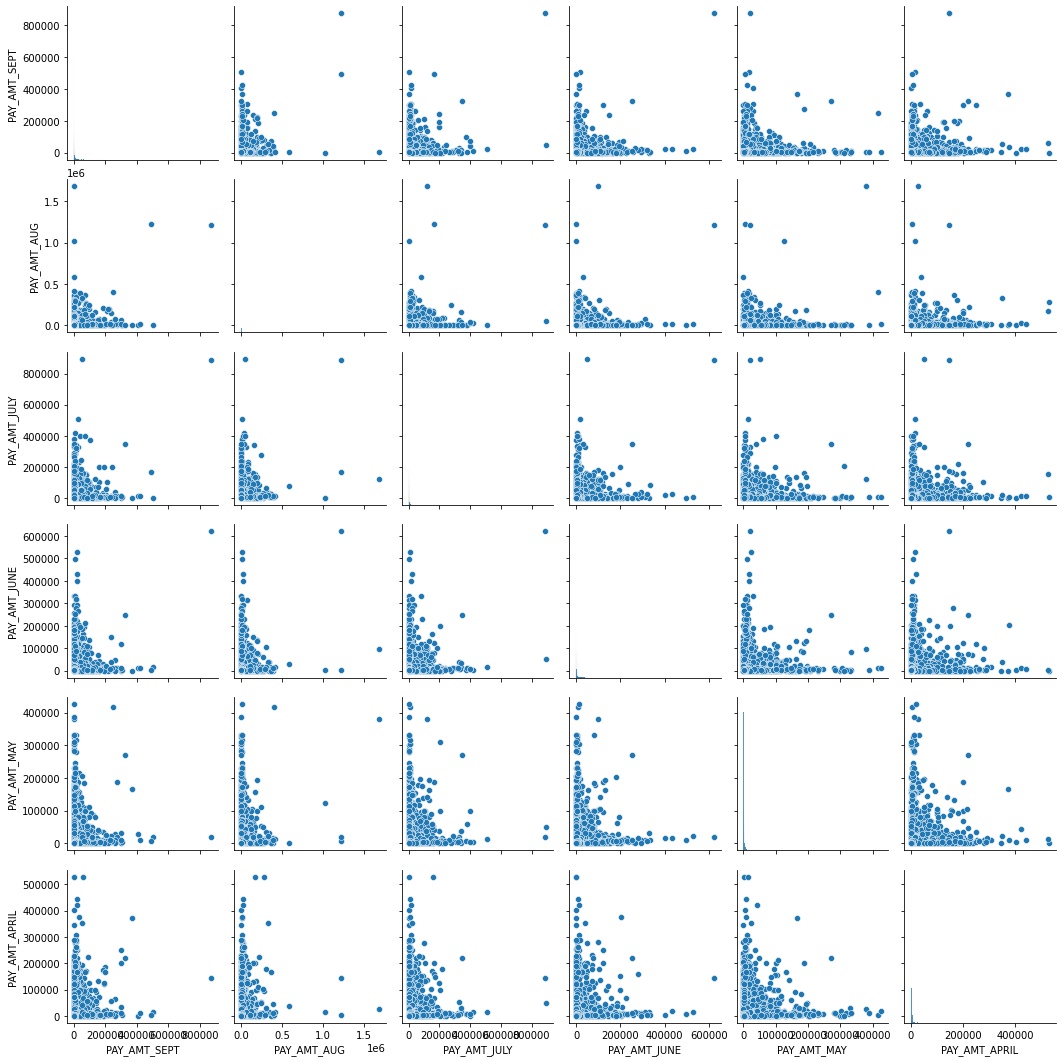

In [ ]:
# pairplpot of PREVIOUS PAYMENT of different months 
sns.pairplot(data = cred_df[pay_amt])

# **Correlation Matrix**

In [ ]:
# Create a dataframe copy
cred_df_copy = cred_df.copy()

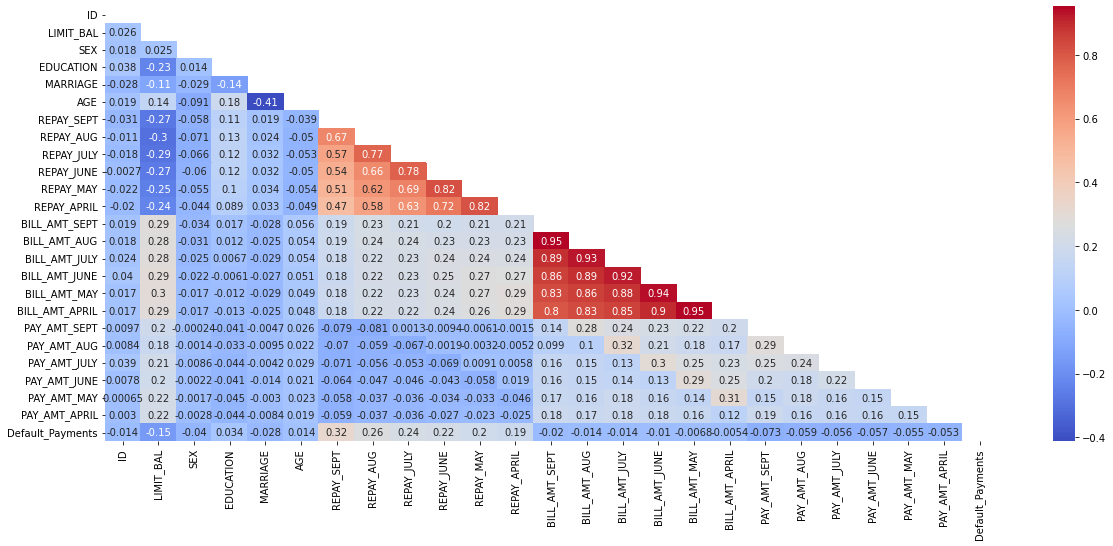

In [ ]:
# Heatmap plot for correlation between different variable
plt.figure(figsize=(20,8))
correlation = cred_df_copy.corr()
mask = np.triu(np.ones_like(cred_df_copy.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')


Conclusion: we can see in above plot that some variable like age are negatively correlated. We can ignore ID as it will not effect the result

#**One Hot Encoding**
One-hot encoding is a technique which is used to convert or transform a categorical feature having string labels into K numerical features in such a manner that the value of one out of K (one-of-K) features is 1 and the value of rest (K-1) features is 0. It is also called as dummy encoding as the features created as part of these techniques are dummy features which don’t represent any real world features. Rather they are created for encoding the different values of categorical feature using dummy numerical features. The primary need for using one-hot encoding technique is to transform or convert the categorical features into numerical features such that machine learning libraries can use the values to train the model.

In [ ]:
# making a copy of dataset
cred_dup_df = cred_df.copy()

In [ ]:
# Apply one hot encoding
cred_dup_df = pd.get_dummies(cred_dup_df,columns = ['EDUCATION','SEX','MARRIAGE'])

In [ ]:
# renaming columns to get better understanding about dummy variables
cred_dup_df.rename(columns = {'EDUCATION_1':'EDUCATION_GRADUATE','EDUCATION_2':'EDUCATION_UNIVERSITY','EDUCATION_3':'EDUCATION_HIGH_SCHOOL','EDUCATION_4':'EDUCATION_OTHERS',
                              'SEX_1':'MALE','SEX_2':'FEMALE','MARRIAGE_1':'SINGLE','MARRIAGE_2':'MARRIED','MARRIAGE_3':'MARRIAGE_OTHERS'},inplace = True)

In [ ]:
cred_dup_df.head(3)

,ID,LIMIT_BAL,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,...,Default_Payments,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,MALE,FEMALE,SINGLE,MARRIED,MARRIAGE_OTHERS
1,1,20000,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,0,0,1,1,0,0
2,2,120000,26,-1,2,0,0,0,2,2682,...,1,0,1,0,0,0,1,0,1,0
3,3,90000,34,0,0,0,0,0,0,29239,...,0,0,1,0,0,0,1,0,1,0


### Preparing data for Data Split

In [ ]:
# Apply one hot encoding
cred_dup_df = pd.get_dummies(cred_dup_df, columns=['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL'])

In [ ]:
 #Drop ID column
#cred_dup_df.drop('ID',axis = 1, inplace = True)
cred_dup_df.drop(['ID','EDUCATION_OTHERS','MARRIAGE_OTHERS'],axis=1, inplace=True)

In [ ]:
cred_dup_df.head(3)

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,...,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
1,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0


##**DIVIDING DATASETS INTO INDEPENDENT AND DEPENDENT VARIABLES**


In [ ]:
#independent variables
X = cred_dup_df.drop(['Default_Payments'],axis = 1)
# dependent variable 
y = cred_dup_df['Default_Payments']

##**SPLITTING X and y INTO TRAINING AND TESTING DATASETS**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(21000, 85)
Shape of y_train:(21000,)
Shape of X_test:(9000, 85)
Shape of y_test:(9000,)


##**As I mentioned above that we have imbalanced dataset that can lead towards biasness while building the model.**
###**To balance our dataset we'll use SMOTE.**

# **SMOTE(Synthetic Minority Oversampling Technique)**:
Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In our dataset we have high imbalanced data distribution in target variable, this happens generally when observation in one of the class are much higher.

As machine learning algorithm tends to increase accuracy by reducing error so they do not consider class distribution.
ML techniques such as Decision Trees and Logistic Regression is biased towards majority class and tend to ignore minority class

In [ ]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: 0    16304
1     4696
Name: Default_Payments, dtype: int64

Dataset After: 0    16304
1    16304
Name: Default_Payments, dtype: int64


## Our Training data is perfectly Balanced.

## Now we can implement different algorithms

#**Modelling**
**Performance Metrics**

Precision is a good metric to use when the costs of false positive(FP) is high.
Precision = TP / (TP + FP)
Recall is a good metric to use when the cost associated with false negative(FN) is high.
Recall = TP / (TP + FN)
F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.
F1-score = 2 (precision recall) / (precision + recall)
In this classification problem there is high cost for bank when a default credit card is predicted as non defaulter. So we will give more importance to recall.



# **Logistic Regression Implementation**

### Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple(underfitting), This parameter signifies strength of the regularization and takes a positive float value. C and regularization strength are negatively correlated (smaller the C is stronger the regularization will be).



In [ ]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.2)

In [ ]:
# Best parameters 
logistic_grid_model.best_params_                          #it will give you the best one among all parameters

{'C': 0.2, 'penalty': 'l2'}

In [ ]:
logistic_grid_model.best_score_

0.6386608769538187

In [ ]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

# **Model Evaluation**

In [ ]:
# importing important metrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [ ]:
# training and testing accuracy 
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.6042382237487733
Testing accuracy: 0.6774444444444444


In [ ]:
# precision, recall, f1 score and confusion matrix
log_test_precision = precision_score(y_test,y_test_pred)
log_test_recall = recall_score(y_test,y_test_pred,)
log_f1_score = f1_score(y_test,y_test_pred)
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

# Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print('Recall score of logistic model:', log_test_recall)
print('F1 score of logistic model: ', log_f1_score)
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print('Confusion matrix of logistic model \n:',log_confusion_mat)

Precision score of logistic model: 0.31712875047474365
Recall score of logistic model: 0.43041237113402064
F1 score of logistic model:  0.36518696698010056
ROC AUC score of logistic model:  0.587869075085424
Confusion matrix of logistic model 
: [[5262 1798]
 [1105  835]]


#**Confusion Matrix**
Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values

Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

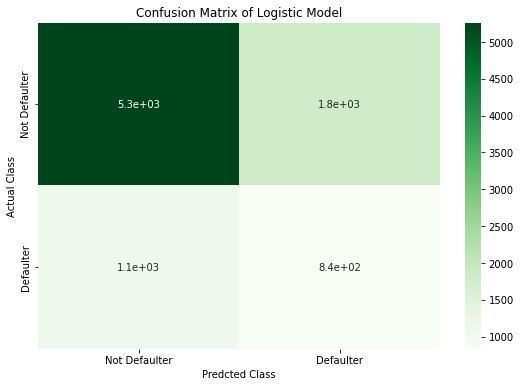

In [ ]:
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

#**DECISION TREE CLASSIFIER**

In [ ]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [ ]:
decision_tree_model.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [ ]:
decision_tree_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
decision_tree_model.best_score_

0.7389642169189935

In [ ]:
decision_tree_model.score(X_train_smt,y_train_smt)

0.7422105004906772

In [ ]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train_smt)
y_test_dtc_pred = decision_tree_model.predict(X_test)

In [ ]:
# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.7457679097154073
Testing accuracy of decision tree classifier: 0.7132222222222222


In [ ]:
# Getting precision, recall, f1_score, roc_auc_score and confusion matrix
dtc_recall_score = recall_score(y_test,y_test_dtc_pred)
dtc_precision_score = recall_score(y_test,y_test_dtc_pred)
dtc_f1_score = f1_score(y_test, y_test_dtc_pred)
dtc_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

# Print all the metrics
print('Recall score of Decision Tree Classifier:',dtc_recall_score)
print('Precision score of Decision Tree Classifier:',dtc_precision_score)
print('F1 score of Decision Tree Classifier:',dtc_f1_score)
print('ROC-AUC score of Decision Tree Classifier:',dtc_roc_auc_score)

Recall score of Decision Tree Classifier: 0.5768041237113402
Precision score of Decision Tree Classifier: 0.5768041237113402
F1 score of Decision Tree Classifier: 0.4644117036729612
ROC-AUC score of Decision Tree Classifier: 0.6637561695043954


#**CONFUSION MATRIX OF DECISION TREE CLASSIFIER**

Confusion Matrix of the Decision Tree Classifier:
 [[5300 1760]
 [ 821 1119]]


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

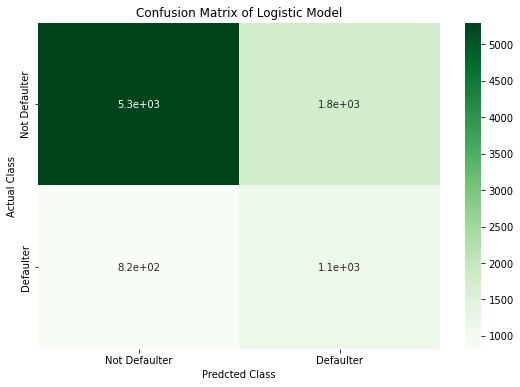

In [ ]:
# plotting confusion matrix of Decision Tree Classifier
dtc_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)
print('Confusion Matrix of the Decision Tree Classifier:\n',dtc_confusion_mat)

labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dtc_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

#**RANDOM FOREST**

In [ ]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [ ]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_smt)
y_test_rf_pred = rf_classifier.predict(X_test)

In [ ]:
# training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 0.9997853287536801
Testing Accuracy of Random Forest: 0.8112222222222222


In [ ]:
# Metrics of Precision, recall, f1 score, confusion matrix and roc_auc score
rf_precision_score = precision_score(y_test_rf_pred,y_test)
rf_recall_score = recall_score(y_test_rf_pred,y_test)
rf_f1_score = f1_score(y_test_rf_pred,y_test)
rf_roc_auc_score = roc_auc_score(y_test_rf_pred,y_test)

print('Precision score of the Random Forest:',rf_precision_score)
print('Recall score of the Random Forest:',rf_recall_score)
print('F1 score of the Random Forest:',rf_f1_score)
print('ROC_AUC score of the Random Forest:',rf_roc_auc_score)

Precision score of the Random Forest: 0.39278350515463917
Recall score of the Random Forest: 0.5939204988308652
F1 score of the Random Forest: 0.47285138070121
ROC_AUC score of the Random Forest: 0.7206352526550336


#**HYPERPARAMETER TUNING**

In [ ]:
params_grid = {'n_estimators' : [100,150,200],'max_depth' : [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.8373160204085289

In [ ]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [ ]:
# Get the predicted classes
y_train_grid_rf_pred = grid_rf_clf.predict(X_train_smt)
y_test_grid_rf_pred = grid_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
rf_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train_smt)
rf_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", rf_training_accuracy)
print("The accuracy on test data is ", rf_testing_accuracy)

The accuracy on train data is  0.9998159960745829
The accuracy on test data is  0.8127777777777778


In [ ]:
# evaluation metrics of RandomForest with hyperparameter tuning
rf_grid_precision_score = precision_score(y_test_grid_rf_pred,y_test)
rf_grid_recall_score = recall_score(y_test_grid_rf_pred,y_test)
rf_grid_f1_score = f1_score(y_test_grid_rf_pred,y_test)
rf_grid_roc_auc_score = roc_auc_score(y_test_grid_rf_pred,y_test)

print('Precision Score of RandomForest with Hyperparameter Tuning:',rf_grid_precision_score)
print('Recall Score of RandomForest with Hyperparameter Tuning:',rf_grid_recall_score)
print('F1 Score of RandomForest with Hyperparameter Tuning:',rf_grid_f1_score)
print('ROC AUC Score of RandomForest with Hyperparameter Tuning:',rf_grid_roc_auc_score)

Precision Score of RandomForest with Hyperparameter Tuning: 0.3974226804123711
Recall Score of RandomForest with Hyperparameter Tuning: 0.5990675990675991
F1 Score of RandomForest with Hyperparameter Tuning: 0.4778431980167338
ROC AUC Score of RandomForest with Hyperparameter Tuning: 0.7237526508238293


#**Confusion Matrix for RandomForest Classifier**

Confusion Matrix for RandomForest Classifier:
  [[6544 1169]
 [ 516  771]]


Text(0.5, 1.0, 'Confusion Matrix of RandomForest Classifier')

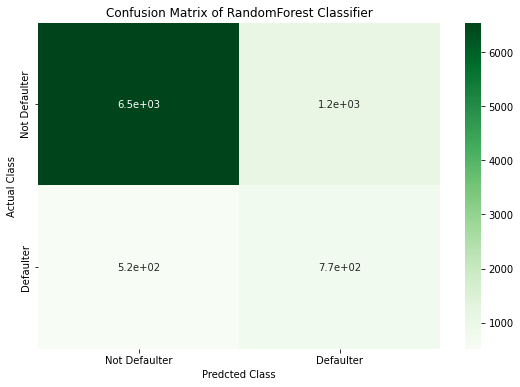

In [ ]:
rf_confusion_mat = confusion_matrix(y_test_grid_rf_pred,y_test)
print('Confusion Matrix for RandomForest Classifier:\n ',rf_confusion_mat)

# Plotting heatmap of confusion matrix
labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RandomForest Classifier',fontsize = 12)

#**XGBoost Implementation**
The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function

In [ ]:
# import xgboost
from xgboost import XGBClassifier

In [ ]:
# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(class_weight='balanced',
              parameters={'eta': 1, 'eval_metric': 'auc', 'max_depth': 7,
                          'silent': 1},
              random_state=42)

In [ ]:
# train and test prediction
y_train_xgb_pred = xgb.predict(X_train_smt)
y_test_xgb_pred = xgb.predict(X_test)

In [ ]:
# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train_smt)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.8711359175662414
Testing Accuracy of XGBClassifier: 0.8165555555555556


In [ ]:
# evaluation metrics of RandomForest with hyperparameter tuning
xgb_precision_score = precision_score(y_test_xgb_pred,y_test)
xgb_recall_score = recall_score(y_test_xgb_pred,y_test)
xgb_f1_score = f1_score(y_test_xgb_pred,y_test)
xgb_roc_auc_score = roc_auc_score(y_test_xgb_pred,y_test)

print('Precision Score of RandomForest with Hyperparameter Tuning:',xgb_precision_score)
print('Recall Score of RandomForest with Hyperparameter Tuning:',xgb_recall_score)
print('F1 Score of RandomForest with Hyperparameter Tuning:',xgb_f1_score)
print('ROC AUC Score of RandomForest with Hyperparameter Tuning:',xgb_roc_auc_score)

Precision Score of RandomForest with Hyperparameter Tuning: 0.39639175257731957
Recall Score of RandomForest with Hyperparameter Tuning: 0.6156925540432346
F1 Score of RandomForest with Hyperparameter Tuning: 0.48228284728755094
ROC AUC Score of RandomForest with Hyperparameter Tuning: 0.732307636846156


Confusion Matrix for XGBClassifier:
  [[6580 1171]
 [ 480  769]]


Text(0.5, 1.0, 'Confusion Matrix of XGBClassifier')

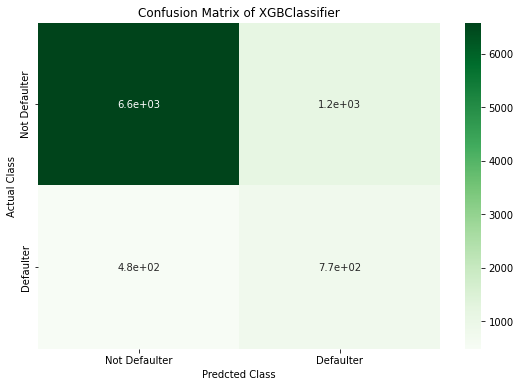

In [ ]:
# XG-Boost confusion matrix
xgb_confusion_mat = confusion_matrix(y_test_xgb_pred,y_test)
print('Confusion Matrix for XGBClassifier:\n ',xgb_confusion_mat)

# Plotting heatmap of confusion matrix
labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xgb_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBClassifier',fontsize = 12)

#**MODEL EXPLAINABILITY**

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 4.8 MB/s 


## **APPLYING SHAPLEY TO GET FEATURES IMPORTANCE**
The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance

In [ ]:
from shap import TreeExplainer
from shap import summary_plot
from shap import force_plot

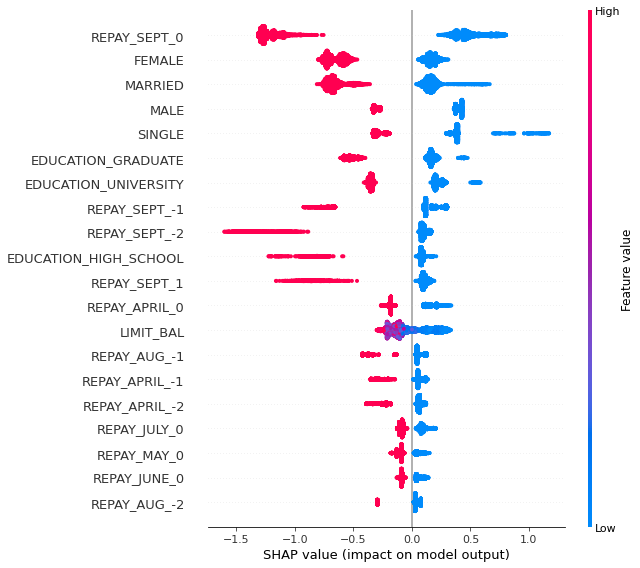

In [ ]:
# plotting summary plot
explainer = TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values,X_test)

From the Shap Summary_Plot we can explain our complex model.

* Red shows the high features values and blue shows low feature values.
* On X axis there are shap values, positive will tell you about defaulter and negative values will tell customers will not default in next month.
* On y-axis, features are ordered in decreasing order in sense of importance for the XGBoost model to predict the default.

# **Model Explaination**
Top most features are the most important features to predict default payment like (Repayment_sept_0(revolving credit limit),Female, Male, Married, Single etc.)
Higher the value of Repay_sept_0, there will be low chance that customer will default next month, lower the value of Repay_sept_0, there will be high chance of default next month.
Similarly for the features(FEMALE, MALE, SINGLE, MARRIED, EDUCATION_GRADUATE, EDUCATION_UNIVERSITY).
LIMIT_BAL is also important feature to explain our model. Higher the values of Limit balance there are less chance of default, lower the values of limit balance there are more chance of default.

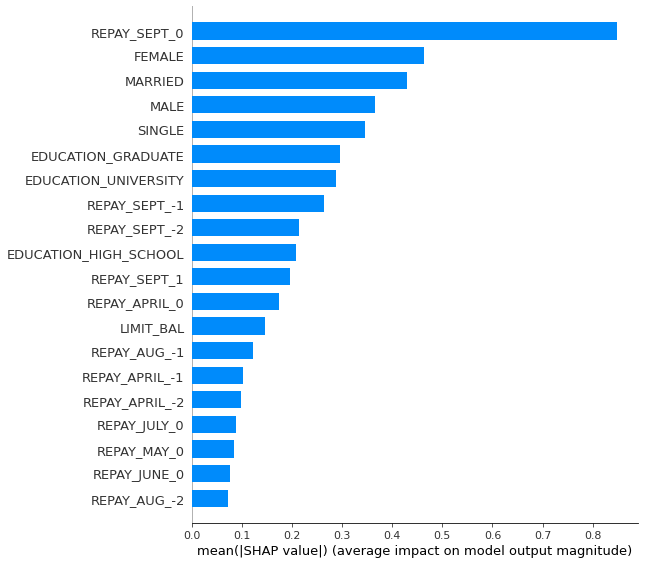

In [ ]:
# shap summary_plot with bar
summary_plot(shap_values, X_train_smt, plot_type="bar")

##**Repay_Sept_0(Repayment status in september) is the most important feature, followed by Female, married, single. Similarly applies for the rest of the features in above summary_plot.**

#**EVALUATION MATRIX**

In [ ]:
# explaining evaluation matrix
Models = ['Logistic Regression','Decision Tree Classifier','Random Forest', 'XGBoost Classifier']
train_accuracy = [train_accuracy, dtc_training_accuracy, rf_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, dtc_testing_accuracy, rf_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, dtc_precision_score, rf_grid_precision_score, xgb_precision_score]
recall_score = [log_test_recall, dtc_recall_score, rf_grid_recall_score,xgb_recall_score]
f1_score = [log_f1_score, dtc_f1_score, rf_grid_f1_score, xgb_f1_score]
roc_auc_score = [log_roc_auc_score, dtc_roc_auc_score, rf_grid_roc_auc_score, xgb_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

In [ ]:
evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.604238,0.677444,0.317129,0.430412,0.365187,0.587869
1,Decision Tree Classifier,0.745768,0.713222,0.576804,0.576804,0.464412,0.663756
2,Random Forest,0.999816,0.812778,0.397423,0.599068,0.477843,0.723753
3,XGBoost Classifier,0.871136,0.816556,0.396392,0.615693,0.482283,0.732308


##**From the above Evaluation Matrix we can simply overlook all the models behaviour and their important matrix**

#**Plot ROC-AUC Curve**

##**ROC(receiver operating characteristic curve) - AUC(area under curve) curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.**


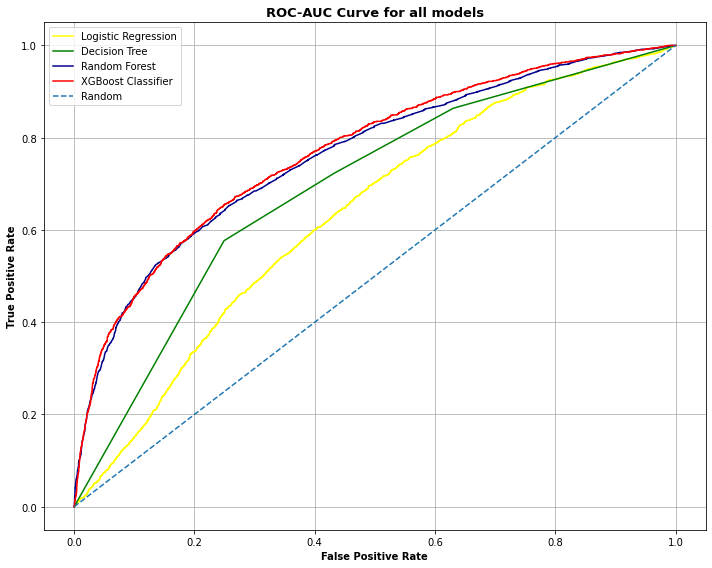

In [ ]:
from sklearn import metrics
# predicting probabilities for all model used
y_log_proba = logistic_grid_model.predict_proba(X_test)[::,1]
y_dtc_proba = decision_tree_model.predict_proba(X_test)[::,1]
y_rf_proba = grid_rf_clf.predict_proba(X_test)[::,1]
y_xgb_proba = xgb.predict_proba(X_test)[::,1]

# define metrics
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_log_proba)
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  y_dtc_proba)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_rf_proba)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_xgb_proba)

#
random_probs = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)

# plotting ROC-AUC curve
plt.figure(figsize = (10,8))
plt.grid(True)

# plot the the ROC-AUC curve for the logistic Model
plt.plot(fpr_log, tpr_log, linestyle='-',color='yellow', label='Logistic Regression')

# plot the ROC-AUC curve for the decision tree model
plt.plot(fpr_dtc, tpr_dtc, linestyle='-',color='green', label='Decision Tree')

# plot the ROC-AUC curve for the RandomForest
plt.plot(fpr_rf, tpr_rf, linestyle='-',color='darkblue', label='Random Forest')

# plot the ROC-AUC curve for the xgb model
plt.plot(fpr_xgb, tpr_xgb, linestyle='-',color='red', label='XGBoost Classifier')

#plot the ROC-AUC curve for the random model 
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')


# Defining titles and co-ordinates labels
plt.title('ROC-AUC Curve for all models',fontweight = 'bold', fontsize = 13)
plt.xlabel('False Positive Rate',fontweight = 'bold')
plt.ylabel('True Positive Rate',fontweight = 'bold')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

#**CONCLUSION**
* By Visualtization customers who are 35 years of age are more likely to be defaulter.
* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
* One-Hot encoding method is used to deal with categorical variable having  string labels into k numerical features, like Age, Marriage, Education etc.
* We had Imbalanced dataset so, to deal with this problem SMOTE(Synthetic Minority Oversampling Technique) has been applied after splitting the data.

**Four models have been applied on the data to assess the which model is best to evaluate the defaulter(Logistic Regression, Decision Tree Classifier, Random Forest and XGBoost classifier).**

* Using a Logistic Regression classifier, we can predict with 66.37% accuracy, whether a customer is likely to default next month.
* Using Decision Tree classifier, we can predict with 71.83% accuracy whether a customer is likely to default next month or not.
*Using Random Forest, we can predict with 81.38% accuracy whether a customer will be defaulter in next month or not.
* By applying XGBoost Classifier with recall 60.60%, we can predict with 81.60% accuracy whether a customer is likely to default next month.

**From the models that are applied on the dataset, XGBoost and Random Forest are giving the best evaluation metrices(precision, F1-score and ROC-AUC score).**

On behalf of these metrices we can predict whether customers would be defaulter or not in the next month.

From the **ROC-AUC** curve, Random Forest and XGBoost classifier are more able to distinguish between positive and negative class.